### Location of parking meters

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [67]:
main_df = pd.read_csv('treas_parking_meters_loc_datasd.csv')

main_df.head()

,zone,area,sub_area,pole,config_id,config_name,date_inventory,lat,lng,sapid
0,Downtown,Core,1000 FIRST AVE,1-1004,49382,Sunday Mode,2021-01-04,32.715904,-117.163929,SS-000031
1,Downtown,Core - Columbia,1000 FIRST AVE,1-1004,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat (NFC),2018-11-11,32.715904,-117.163929,SS-000031
2,Downtown,Core,1000 FIRST AVE,1-1006,49382,Sunday Mode,2021-01-04,32.716037,-117.163930,SS-000031
3,Downtown,Core - Columbia,1000 FIRST AVE,1-1006,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat (NFC),2018-11-11,32.716037,-117.163930,SS-000031
4,Downtown,Core,1000 FIRST AVE,1-1008,49382,Sunday Mode,2021-01-04,32.716169,-117.163931,SS-000031


In [68]:
main_df = main_df[['zone','pole','lat','lng']]

main_df.head()

,zone,pole,lat,lng
0,Downtown,1-1004,32.715904,-117.163929
1,Downtown,1-1004,32.715904,-117.163929
2,Downtown,1-1006,32.716037,-117.163930
3,Downtown,1-1006,32.716037,-117.163930
4,Downtown,1-1008,32.716169,-117.163931


In [69]:
main_df = main_df.drop_duplicates().reset_index(drop=True)
main_df = main_df[main_df['lat'] != 90].reset_index(drop=True)
main_df['lng'] = main_df['lng'].apply(abs) * -1
main_df = main_df[main_df['lat'] > 32.6].reset_index(drop=True)
main_df = main_df[main_df['lng'] > -117.4].reset_index(drop=True)

In [95]:
main_df.to_csv('location_of_each_pole.csv')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='lng', ylabel='lat'>

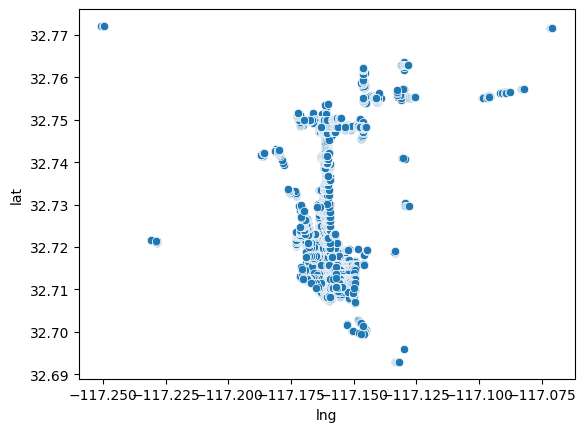

In [70]:
sns.scatterplot(x=main_df['lng'], y=main_df['lat'])

## GeoPandas

Following this tutorial: https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

In [76]:
#!pip install geopandas

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [78]:
street_map = gpd.read_file('tl_2022_06073_faces/tl_2022_06073_faces.shp')

<Axes: >

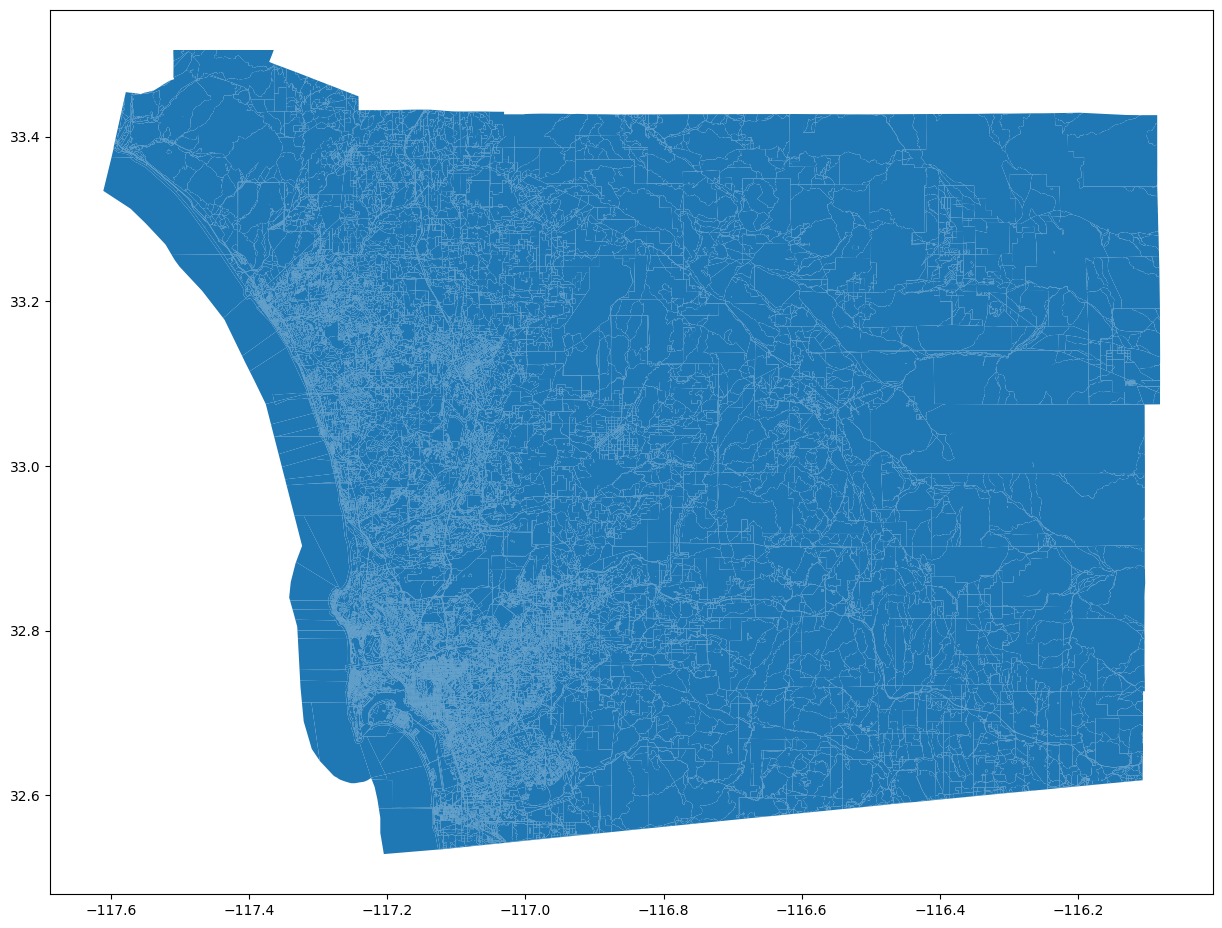

In [79]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)

In [80]:
crs = {'init':'epsg:4326'}

In [81]:
geometry = [Point(xy) for xy in zip(main_df['lng'], main_df['lat'])]

In [84]:
geo_df = gpd.GeoDataFrame(main_df, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



,zone,pole,lat,lng,geometry
0,Downtown,1-1004,32.715904,-117.163929,POINT (-117.16393 32.71590)
1,Downtown,1-1006,32.716037,-117.163930,POINT (-117.16393 32.71604)
2,Downtown,1-1008,32.716169,-117.163931,POINT (-117.16393 32.71617)
3,Downtown,1-1020,32.717890,-117.161278,POINT (-117.16128 32.71789)
4,Downtown,1-1310,32.719024,-117.163951,POINT (-117.16395 32.71902)


In [87]:
geo_df['zone'].value_counts()

zone
Downtown                      3300
Uptown                        2396
Mid-City                       273
City                            76
San Diego, CA Default Zone      48
Name: count, dtype: int64

(-117.3, -117.0)

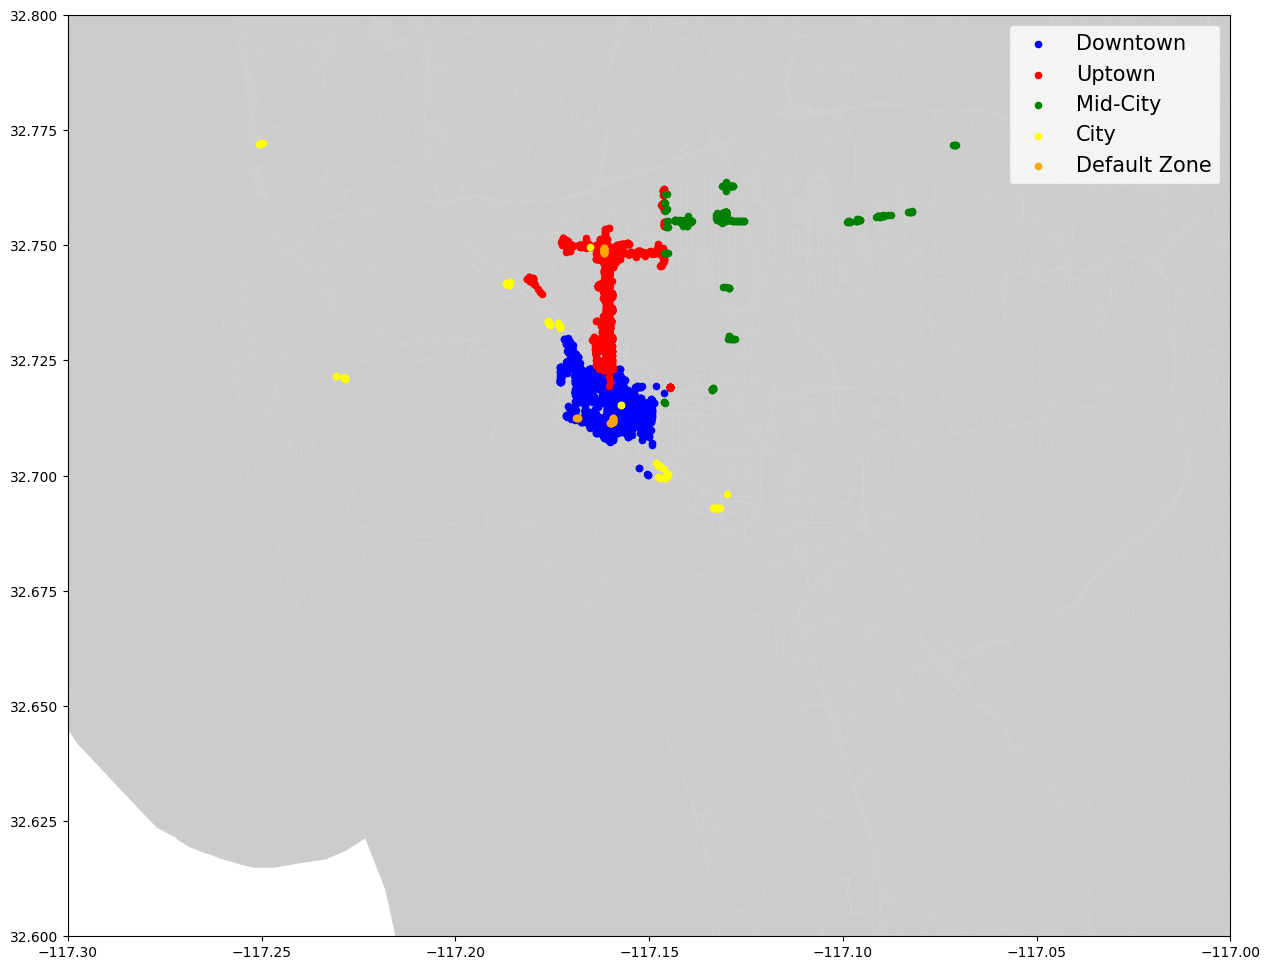

In [93]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df[geo_df['zone'] == 'Downtown'].plot(ax=ax, 
                                       markersize=20, 
                                       color='blue', 
                                       #marker='o', 
                                       label='Downtown')
geo_df[geo_df['zone'] == 'Uptown'].plot(ax=ax, 
                                       markersize=20, 
                                       color='red', 
                                       #marker='^', 
                                       label='Uptown')
geo_df[geo_df['zone'] == 'Mid-City'].plot(ax=ax, 
                                       markersize=20, 
                                       color='green', 
                                       #marker='^', 
                                       label='Mid-City')
geo_df[geo_df['zone'] == 'City'].plot(ax=ax, 
                                       markersize=20, 
                                       color='yellow', 
                                       #marker='^', 
                                       label='City')
geo_df[geo_df['zone'] == 'San Diego, CA Default Zone'].plot(ax=ax, 
                                       markersize=20, 
                                       color='orange', 
                                       #marker='^', 
                                       label='Default Zone')
plt.legend(prop={'size':15})
plt.ylim(32.6,32.8)
plt.xlim(-117.3,-117.0)